In [59]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [60]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1

X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [61]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
#clf = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)

clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc[0.0,'All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc[1.0,'All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc[0.0,'All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc[1.0,'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


print(table_train)
print(table_test)

Training set accuracy:
Percent Type I errors: 0.0756433007985803
Percent Type II errors: 0.4571529745042493

Test set accuracy:
Percent Type I errors: 0.100990099009901
Percent Type II errors: 0.4870967741935484
col_0     0.0   1.0   All
partner                  
0.0      4167   341  4508
1.0      1291  1533  2824
All      5458  1874  7332
col_0    0.0  1.0  All
partner               
0.0      454   51  505
1.0      151  159  310
All      605  210  815


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

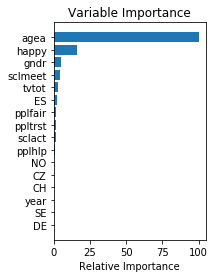

In [62]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

# Challenge: My challenge assignment submission follows

In [63]:
corr_df = df.corr()
corr_df

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
idno,1.000000,0.002102,0.003963,-0.007523,0.007397,0.004484,-0.003065,-0.021376,0.004323,0.010851,0.030051,-0.014931
year,0.002102,1.000000,-0.031596,-0.001600,0.004283,-0.032901,-0.013378,-0.028502,0.012150,0.001355,-0.003520,0.018689
tvtot,0.003963,-0.031596,1.000000,-0.142422,-0.119277,-0.069080,-0.118598,-0.078864,-0.092375,0.017922,0.257674,-0.028816
ppltrst,-0.007523,-0.001600,-0.142422,1.000000,0.597506,0.459250,0.231533,0.122555,0.137491,-0.029921,-0.029412,-0.034371
pplfair,0.007397,0.004283,-0.119277,0.597506,1.000000,0.480931,0.247755,0.096501,0.128808,0.022251,0.014724,-0.034054
pplhlp,0.004484,-0.032901,-0.069080,0.459250,0.480931,1.000000,0.215323,0.080489,0.092673,0.042046,0.040351,-0.022069
happy,-0.003065,-0.013378,-0.118598,0.231533,0.247755,0.215323,1.000000,0.182944,0.192030,-0.022413,-0.042970,-0.145061
sclmeet,-0.021376,-0.028502,-0.078864,0.122555,0.096501,0.080489,0.182944,1.000000,0.283319,0.009533,-0.194443,0.162970
sclact,0.004323,0.012150,-0.092375,0.137491,0.128808,0.092673,0.192030,0.283319,1.000000,-0.031648,-0.059442,0.011405
gndr,0.010851,0.001355,0.017922,-0.029921,0.022251,0.042046,-0.022413,0.009533,-0.031648,1.000000,0.020598,0.033984


In [64]:
titles_features_selected = corr_df['partner'].sort_values(ascending=False).head(5).drop('partner') #I need to arrange this in descending order.  See list sort docmentation.

titles_features_selected


sclmeet    0.162970
gndr       0.033984
year       0.018689
sclact     0.011405
Name: partner, dtype: float64

In [65]:
#df

In [66]:



new_x = df[df.columns]
#new_x.drop(g)
new_x

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0
10,CH,55.0,6,1.0,6.0,7.0,7.0,9.0,5.0,2.0,2.0,33.0,1.0


In [67]:
corr_df = df.corr()

In [68]:
titles2_features_selected = corr_df['partner'].sort_values(ascending=False).drop('partner') 

print(abs(titles2_features_selected).sort_values(ascending=False))


agea       0.256670
sclmeet    0.162970
happy      0.145061
ppltrst    0.034371
pplfair    0.034054
gndr       0.033984
tvtot      0.028816
pplhlp     0.022069
year       0.018689
idno       0.014931
sclact     0.011405
Name: partner, dtype: float64


#df.insert(8, 'agea coef', '')

#cosign similarity 

from sklearn.metrics.pairwise import cosine_similarity


c = df[['agea', 'partner']]
similarity = cosine_similarity(c, Y=None, dense_output=True)

print(similarity)

agea_partner_df = [['agea coef', 'partner_coef']]
print(agea_partner_df)
for aitem in df['agea']:
    pd.corr()
    for i in df['partner']:
        age_coef = corr(aitem, i)
        df['agea coef'].append(agea_coef)
        print(df['agea coef'])

In [69]:
df.drop(df['partner'])

df

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0
10,CH,55.0,6,1.0,6.0,7.0,7.0,9.0,5.0,2.0,2.0,33.0,1.0


In [70]:
x_new = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
#x_new = df.loc[:, ~df.columns.isin(['happy_tvtot_distances', 'happy_age_distances', 'sclmeet_sclact_distances'])]

x_new.shape

(8147, 10)

In [71]:
 x_new = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
x_new

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,...,DE,ES,NO,SE,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,...,0,0,0,0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,...,0,0,0,0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,...,0,0,0,0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,...,0,0,0,0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,...,0,0,0,0,1,0,0,0,0,0
6,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,...,0,0,0,0,1,0,0,0,0,0
7,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,...,0,0,0,0,1,0,0,0,0,0
8,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,...,0,0,0,0,1,0,0,0,0,0
9,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,...,0,0,0,0,1,0,0,0,0,0
10,6,1.0,6.0,7.0,7.0,9.0,5.0,2.0,2.0,33.0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
#df.drop(df['idno'])

In [74]:
print(y.shape)
print(x_new.shape)

(8147,)
(8147, 22)


In [75]:
from sklearn.model_selection import train_test_split

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.20)



In [76]:
print(y.shape)
print(x_new.shape)
print(x_train_new.shape)
print(y_train_new.shape)
print(x_test_new.shape)
print(y_test_new.shape)

(8147,)
(8147, 22)
(6517, 16)
(6517,)
(1630, 16)
(1630,)


In [88]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


#clf_new = ensemble.GradientBoostingClassifier(**params)
clf_new = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=150, subsample=.5, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=7, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features='auto', verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
clf_new.fit(x_train_new, y_train_new)

predict_train_new = clf_new.predict(x_train_new)
predict_test_new = clf_new.predict(x_test_new)

# Accuracy tables.
table_train_new = pd.crosstab(y_train_new, predict_train_new, margins=True)
table_test_new = pd.crosstab(y_test_new, predict_test_new, margins=True)

train_tI_errors_new = table_train_new.loc[0.0,1.0] / table_train_new.loc[0.0,'All']
train_tII_errors_new = table_train_new.loc[1.0,0.0] / table_train_new.loc[1.0,'All']

test_tI_errors_new = table_test_new.loc[0.0,1.0]/table_test_new.loc[0.0,'All']
test_tII_errors_new = table_test_new.loc[1.0,0.0]/table_test_new.loc[1.0,'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors_new, train_tII_errors_new, test_tI_errors_new, test_tII_errors_new))


print(table_train_new)
print(table_test_new)

Training set accuracy:
Percent Type I errors: 0.006251562890722681
Percent Type II errors: 0.1096108022239873

Test set accuracy:
Percent Type I errors: 0.13609467455621302
Percent Type II errors: 0.45292207792207795
col_0     0.0   1.0   All
partner                  
0.0      3974    25  3999
1.0       276  2242  2518
All      4250  2267  6517
col_0     0.0  1.0   All
partner                 
0.0       876  138  1014
1.0       279  337   616
All      1155  475  1630


# Question for Mike:

### Why is the rate of test set type II errors so high, compared to the other error scores?
